In [65]:
import pandas as pd

# Load the datasets
posts_df = pd.read_excel('/content/revolt_24.xlsx')
stopwords_df = pd.read_excel('/content/stopwords_bangla.xlsx')

In [66]:
posts_df.head()

,Unnamed: 0,Headline,Sentiment
0,0,ঢাকা বিশ্ববিদ্যালয়: কোটাবিরোধী আন্দোলনের নেতাক...,outrage
1,1,কোটাবিরোধী আন্দোলনে ঢাকা বিশ্ববিদ্যালয়ের বিএনপ...,hope
2,2,কোটাবিরোধী আন্দোলন : আজও জিরো পয়েন্ট অবরোধ করে...,outrage
3,3,"সর্বজনীন পেনশন: সরকার অনড়, আন্দোলন চালিয়ে যাবে...",outrage
4,4,আজ শনিবার সকাল সাড়ে ১০টার দিকে মহাসড়কের শহর বা...,outrage


In [67]:
stopwords_df.head()

,Unnamed: 0,words
0,0,অই
1,1,অগত্যা
2,2,অত: পর
3,3,অতএব
4,4,অথচ


In [68]:
def english_to_bangla_number_text(number):
    """Converts an English number to Bangla textual representation."""
    bangla_numbers = {
        0: "শূন্য", 1: "এক", 2: "দুই", 3: "তিন", 4: "চার",
        5: "পাঁচ", 6: "ছয়", 7: "সাত", 8: "আট", 9: "নয়",
        10: "দশ", 11: "এগারো", 12: "বারো", 13: "তেরো", 14: "চৌদ্দ",
        15: "পনেরো", 16: "ষোলো", 17: "সতেরো", 18: "আঠারো", 19: "উনিশ",
        20: "বিশ", 21: "একুশ", 22: "বাইশ", 23: "তেইশ", 24: "চব্বিশ",
        25: "পঁচিশ", 26: "ছাব্বিশ", 27: "সাতাশ", 28: "আটাশ", 29: "ঊনত্রিশ",
        30: "ত্রিশ", 31: "একত্রিশ", 32: "বত্রিশ", 33: "তেত্রিশ", 34: "চৌত্রিশ",
        35: "পঁত্রিশ", 36: "ছত্রিশ", 37: "সাঁইত্রিশ", 38: "আটত্রিশ", 39: "ঊনচল্লিশ",
        40: "চল্লিশ", 41: "একচল্লিশ", 42: "বিয়াল্লিশ", 43: "তেতাল্লিশ", 44: "চুয়াল্লিশ",
        45: "পঁইয়াল্লিশ", 46: "ছিয়াল্লিশ", 47: "সাতচল্লিশ", 48: "আটচল্লিশ", 49: "ঊনপঞ্চাশ",
        50: "পঞ্চাশ", 51: "একান্ন", 52: "বাহান্ন", 53: "তিপ্পান্ন", 54: "চুয়ান্ন",
        55: "পঞ্চান্ন", 56: "ছাপ্পান্ন", 57: "সাতান্ন", 58: "আটান্ন", 59: "ঊনষাট",
        60: "ষাট", 61: "একষট্টি", 62: "বাষট্টি", 63: "তেষট্টি", 64: "চৌষট্টি",
        65: "পঁষট্টি", 66: "ছেষট্টি", 67: "সাতষট্টি", 68: "আটষট্টি", 69: "ঊনসত্তর",
        70: "সত্তর", 71: "একাত্তর", 72: "বাহাত্তর", 73: "তিয়াত্তর", 74: "চুয়াত্তর",
        75: "পঁচাত্তর", 76: "ছিয়াত্তর", 77: "সাতাত্তর", 78: "আটাত্তর", 79: "ঊনআশি",
        80: "আশি", 81: "একাশি", 82: "বিরাশি", 83: "তিরাশি", 84: "চুরাশি",
        85: "পঁচাশি", 86: "ছিয়াশি", 87: "সাতাশি", 88: "আটাশি", 89: "ঊননব্বই",
        90: "নব্বই", 91: "একানব্বই", 92: "বিরানব্বই", 93: "তিরানব্বই", 94: "চুরানব্বই",
        95: "পঁচানব্বই", 96: "ছিয়ানব্বই", 97: "সাতানব্বই", 98: "আটানব্বই", 99: "নিরানব্বই",
    }

    def convert_two_digit_number(n):
        """Handles numbers from 0 to 99 based on direct mapping."""
        if n in bangla_numbers:
            return bangla_numbers[n]
        tens = (n // 10) * 10
        units = n % 10
        return f"{bangla_numbers[tens]} {bangla_numbers[units]}" if units > 0 else bangla_numbers[tens]

    if number < 100:
        return convert_two_digit_number(number)
    elif number < 1000:
        hundreds = number // 100
        remainder = number % 100
        if remainder == 0:
            return f"{bangla_numbers[hundreds]} শত"
        return f"{bangla_numbers[hundreds]} শত {convert_two_digit_number(remainder)}"
    elif number < 100000: #Handle numbers from 1000 to 99,999
        parts = []
        if number >= 1000:
            parts.append(f"{english_to_bangla_number_text(number // 1000)} হাজার")
            number %= 1000
        if number > 0:
            if number >= 100:
              parts.append(english_to_bangla_number_text(number))
            else:
              parts.append(convert_two_digit_number(number))  #handles cases less than 100
        return " ".join(parts)
    elif number < 10000000: #handles numbers from 100,000 to 9,999,999
      parts = []
      if number >= 100000:
          parts.append(f"{english_to_bangla_number_text(number // 100000)} লক্ষ")
          number %= 100000
      if number > 0:
          if number >= 1000:
            parts.append(english_to_bangla_number_text(number))
          elif number > 0:
            if number >= 100:
                parts.append(english_to_bangla_number_text(number))
            else:
              parts.append(convert_two_digit_number(number)) #handle numbers less than 100
      return " ".join(parts)
    else: # Handle numbers >= 10,000,000 (Crore)
        parts = []
        if number >= 10000000:
            parts.append(f"{english_to_bangla_number_text(number // 10000000)} কোটি")
            number %= 10000000
        if number > 0:
            parts.append(english_to_bangla_number_text(number))
        return " ".join(parts)

In [69]:
import re

def text_to_word_list(text):
    text = text.split()
    return text

def replace_strings(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\u2600-\u26FF"          # miscellaneous symbols
                               u"\u2700-\u27BF"          # dingbats
                               u"\u2000-\u206F"          # general punctuations
                               "]+", flags=re.UNICODE)
    english_pattern = re.compile('[a-zA-Z]+', flags=re.I)

    text = emoji_pattern.sub(r'', text)
    text = english_pattern.sub(r'', text)

    return text

def remove_punctuations(my_str):
    punctuations = '''````£|¢|Ñ+-*/=EROero৳০১২৩৪৫৬৭৮৯012–34567•89।!()-[]{};:'"“\’,<>./?@#$%^&*_~‘—॥”‰🤣⚽️✌�￰৷￰'''
    no_punct = ""
    for char in my_str:
        if char not in punctuations:
            no_punct += char

    return no_punct

def convert_numbers_to_bangla(text):
    words = text.split()
    converted_words = []
    for word in words:
        if word.isdigit():  # Check if the word is an integer
            bangla_number = english_to_bangla_number_text(int(word))
            converted_words.append(bangla_number)
        else:
            converted_words.append(word)
    return ' '.join(converted_words)

def preprocessing(text):
    text = replace_strings(text)
    text = convert_numbers_to_bangla(text)  # Convert numbers to Bangla
    text = remove_punctuations(text)
    return text

In [70]:
def test_preprocessing():
    test_cases = [
        ("আজ আমার জন্মদিন 🎉! আমি 89 বছর পুরনো।", "আজ আমার জন্মদিন আমি পঁচিশ বছর পুরনো।"),
    ]

    for i, (input_text, expected_output) in enumerate(test_cases, 1):
        result = preprocessing(input_text)
        print(f"'{expected_output}' || '{result}'")

# Run the tests
test_preprocessing()

'আজ আমার জন্মদিন আমি পঁচিশ বছর পুরনো।' || 'আজ আমার জন্মদিন  আমি ঊননব্বই বছর পুরনো'


In [71]:
# prompt: for each Headline column of posts_df, apply the preprocessing function to each row

posts_df['Headline'] =posts_df['Headline'].apply(lambda x: preprocessing(str(x)))
posts_df.head()

,Unnamed: 0,Headline,Sentiment
0,0,ঢাকা বিশ্ববিদ্যালয় কোটাবিরোধী আন্দোলনের নেতাকে...,outrage
1,1,কোটাবিরোধী আন্দোলনে ঢাকা বিশ্ববিদ্যালয়ের বিএনপ...,hope
2,2,কোটাবিরোধী আন্দোলন আজও জিরো পয়েন্ট অবরোধ করে ...,outrage
3,3,সর্বজনীন পেনশন সরকার অনড় আন্দোলন চালিয়ে যাবেন ...,outrage
4,4,আজ শনিবার সকাল সাড়ে টার দিকে মহাসড়কের শহর বাইপ...,outrage


In [72]:
# Remove Stopwords
def stopwordRemoval(text):
    x=str(text)
    l=x.split()

    stm=[elem for elem in l if elem not in stopwords_df]

    out=' '.join(stm)

    return str(out)

In [73]:
posts_df['Headline'] =posts_df['Headline'].apply(lambda x: stopwordRemoval(str(x)))
posts_df.head()

,Unnamed: 0,Headline,Sentiment
0,0,ঢাকা বিশ্ববিদ্যালয় কোটাবিরোধী আন্দোলনের নেতাকে...,outrage
1,1,কোটাবিরোধী আন্দোলনে ঢাকা বিশ্ববিদ্যালয়ের বিএনপ...,hope
2,2,কোটাবিরোধী আন্দোলন আজও জিরো পয়েন্ট অবরোধ করে খ...,outrage
3,3,সর্বজনীন পেনশন সরকার অনড় আন্দোলন চালিয়ে যাবেন ...,outrage
4,4,আজ শনিবার সকাল সাড়ে টার দিকে মহাসড়কের শহর বাইপ...,outrage


In [74]:
!pip install banglanltk bangla-stemmer

In [75]:
print(posts_df['Sentiment'].unique())

['outrage' 'hope' 'despair']


In [76]:
# Tokenize
def tokenized_data(sent):
    tokenized_text = sent.split()
    return tokenized_text

posts_df['Headline'] = [tokenized_data(sent) for sent in posts_df['Headline'].tolist()]

In [77]:
# prompt: After tokenization, i want to create an array or a set, from each row, each list of words in the column 'Headline', add all the words into that list, and find out the length of the unique words.

from collections import Counter

unique_words_per_row = []
for row in posts_df['Headline']:
    unique_words_per_row.append(len(set(row)))

print(unique_words_per_row)
# Calculate the total number of unique words across all rows
all_words = [word for row in posts_df['Headline'] for word in row]
total_unique_words = len(set(all_words))
print(f"Total number of unique words across all rows: {total_unique_words}")

# #Example using Counter to get the frequency of each word
# word_counts = Counter(all_words)
# word_counts

[8, 7, 11, 8, 25, 16, 10, 5, 11, 5, 10, 8, 8, 15, 6, 20, 11, 8, 6, 7, 8, 5, 30, 9, 8, 22, 12, 5, 5, 8, 9, 7, 5, 10, 9, 7, 15, 9, 23, 11, 18, 22, 30, 9, 11, 12, 16, 7, 12, 11, 11, 11, 7, 8, 10, 10, 12, 6, 10, 6, 12, 7, 4, 7, 20, 10, 8, 19, 14, 6, 11, 18, 19, 13, 7, 6, 19, 12, 15, 16, 11, 23, 18, 24, 22, 21, 20, 8, 7, 19, 6, 17, 7, 6, 8, 9, 17, 6, 8, 10, 5, 16, 5, 14, 20, 14, 14, 22, 16, 11, 11, 10, 16, 9, 7, 7, 6, 12, 12, 8, 5, 21, 25, 10, 20, 8, 15, 32, 21, 14, 23, 20, 9, 24, 22, 18, 20, 21, 9, 16, 9, 9, 12, 11, 12, 18, 20, 18, 14, 9, 19, 14, 9, 17, 21, 18, 10, 9, 10, 7, 10, 13, 7, 16, 14, 12, 11, 18, 5, 6, 12, 8, 17, 8, 9, 14, 19, 5, 23, 20, 22, 11, 22, 15, 17, 24, 19, 19, 23, 18, 7, 10, 9, 16, 10, 8, 10, 10, 12, 7, 7, 10, 8, 10, 17, 20, 9, 6, 9, 8, 17, 11, 13, 12, 15, 11, 3, 5, 17, 8, 16, 11, 14, 8, 12, 9, 8, 17, 13, 7, 9, 10, 15, 6, 8, 19, 7, 9, 11, 15, 12, 7, 12, 7, 9, 4, 10, 8, 8, 14, 8, 8, 13, 6, 9, 9, 8, 6, 9, 9, 7, 7, 10, 10, 4, 9, 6, 12, 8, 9, 21, 13, 11, 7, 6, 15, 7, 7, 6, 10

In [78]:
posts_df.head()

,Unnamed: 0,Headline,Sentiment
0,0,"[ঢাকা, বিশ্ববিদ্যালয়, কোটাবিরোধী, আন্দোলনের, ন...",outrage
1,1,"[কোটাবিরোধী, আন্দোলনে, ঢাকা, বিশ্ববিদ্যালয়ের, ...",hope
2,2,"[কোটাবিরোধী, আন্দোলন, আজও, জিরো, পয়েন্ট, অবরোধ...",outrage
3,3,"[সর্বজনীন, পেনশন, সরকার, অনড়, আন্দোলন, চালিয়ে,...",outrage
4,4,"[আজ, শনিবার, সকাল, সাড়ে, টার, দিকে, মহাসড়কের, ...",outrage


In [79]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import numpy as np
import gensim
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [80]:
# Label Encoding and Splitting Data
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(posts_df['Sentiment'])
X = posts_df['Headline']

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [82]:
# TF-IDF Feature Extraction
tfidf = TfidfVectorizer(ngram_range=(1, 3), max_features=10000, use_idf=True, tokenizer=lambda x: x.split())
X_train_tfidf = tfidf.fit_transform([' '.join(tokens) for tokens in X_train])
X_test_tfidf = tfidf.transform([' '.join(tokens) for tokens in X_test])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [83]:
# Word2Vec Embeddings
w2v_model = Word2Vec(sentences=X_train, vector_size=100, window=5, min_count=1, sg=0, workers=4)
w2v_model.train(X_train, total_examples=w2v_model.corpus_count, epochs=10)

def get_word2vec_embedding(tokens, model):
    embeddings = [model.wv[token] for token in tokens if token in model.wv]
    return np.mean(embeddings, axis=0) if embeddings else np.zeros(model.vector_size)

X_train_w2v = np.array([get_word2vec_embedding(tokens, w2v_model) for tokens in X_train])
X_test_w2v = np.array([get_word2vec_embedding(tokens, w2v_model) for tokens in X_test])

In [84]:
# Model Training and Evaluation
label_order = label_encoder.classes_

def train_and_evaluate_model(model, X_train, y_train, X_test, y_test, model_name, feature_type, original_X_test):
    print(f"\nTraining {model_name} with {feature_type} features...")
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
    print("Test Accuracy:", accuracy_score(y_test, y_pred_test))
    print("Classification Report:\n", classification_report(y_test, y_pred_test, target_names=label_order))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred_test)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_order, yticklabels=label_order)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix for {model_name} ({feature_type})")
    plt.show()

    #Example output of prediction
    print("\nSample Predictions:")
    for i in range(min(5, len(original_X_test))):
       print(f"Text: {' '.join(original_X_test.iloc[i])}, Predicted: {label_order[y_pred_test[i]]}, True: {label_order[y_test[i]]}")

In [85]:
# Models with TF-IDF
models_tfidf = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "KNN": KNeighborsClassifier()
}

original_X_test = X_test


Training Logistic Regression with TF-IDF features...
Train Accuracy: 0.9432799013563502
Test Accuracy: 0.6995073891625616
Classification Report:
               precision    recall  f1-score   support

     despair       0.73      0.74      0.74       164
        hope       0.67      0.81      0.73       168
     outrage       0.74      0.35      0.48        74

    accuracy                           0.70       406
   macro avg       0.71      0.63      0.65       406
weighted avg       0.71      0.70      0.69       406



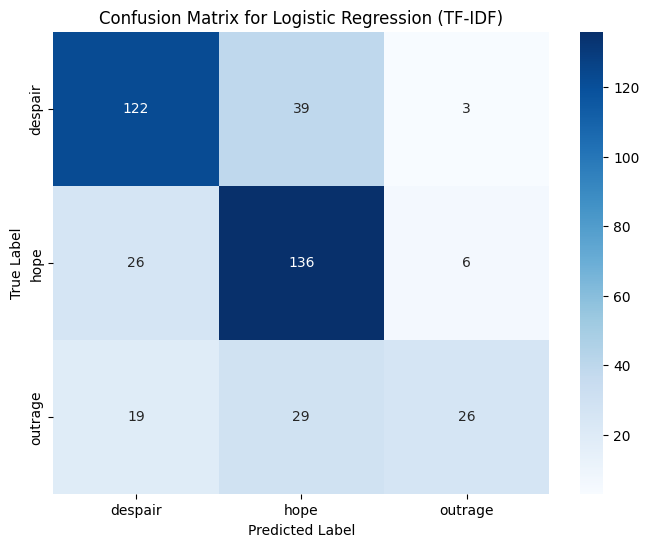


Sample Predictions:
Text: বৃষ্টির মধ্যে রাজশাহী বিশ্ববিদ্যালয়ের সামনের মহাসড়কে হাজারো শিক্ষার্থী, Predicted: hope, True: outrage
Text: জাতিসংঘ মহাসচিবের মুখপাত্র স্টিফেন ডুজারিক বলেছেন বাংলাদেশে সাম্প্রতিক সহিংস কর্মকাণ্ডে জড়িত সব অপরাধীকে জবাবদিহির আওতায় আনতে হবে, Predicted: hope, True: hope
Text: হবিগঞ্জ শহরের প্রধান সড়ক প্রায় দুই ঘন্টা অবরুদ্ধ করে রাখেন শিক্ষার্থীরা, Predicted: hope, True: outrage
Text: কোটাবিরোধী শিক্ষার্থীদের বাংলা ব্লকেড আজও ফার্মগেট পেরোনোর ঘোষণা, Predicted: outrage, True: hope
Text: সহিংসতার তদন্তে জাতিসংঘের সহায়তা থাকলে খুশি হবে বিএনপি, Predicted: hope, True: hope

Training Random Forest with TF-IDF features...
Train Accuracy: 1.0
Test Accuracy: 0.6970443349753694
Classification Report:
               precision    recall  f1-score   support

     despair       0.69      0.80      0.74       164
        hope       0.69      0.70      0.70       168
     outrage       0.72      0.46      0.56        74

    accuracy                           0.70       406
   m

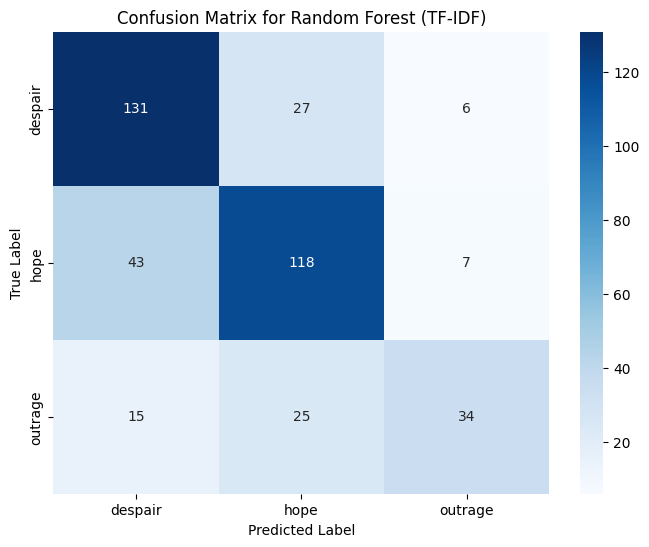


Sample Predictions:
Text: বৃষ্টির মধ্যে রাজশাহী বিশ্ববিদ্যালয়ের সামনের মহাসড়কে হাজারো শিক্ষার্থী, Predicted: hope, True: outrage
Text: জাতিসংঘ মহাসচিবের মুখপাত্র স্টিফেন ডুজারিক বলেছেন বাংলাদেশে সাম্প্রতিক সহিংস কর্মকাণ্ডে জড়িত সব অপরাধীকে জবাবদিহির আওতায় আনতে হবে, Predicted: hope, True: hope
Text: হবিগঞ্জ শহরের প্রধান সড়ক প্রায় দুই ঘন্টা অবরুদ্ধ করে রাখেন শিক্ষার্থীরা, Predicted: hope, True: outrage
Text: কোটাবিরোধী শিক্ষার্থীদের বাংলা ব্লকেড আজও ফার্মগেট পেরোনোর ঘোষণা, Predicted: outrage, True: hope
Text: সহিংসতার তদন্তে জাতিসংঘের সহায়তা থাকলে খুশি হবে বিএনপি, Predicted: hope, True: hope

Training SVM with TF-IDF features...
Train Accuracy: 0.9950678175092479
Test Accuracy: 0.6945812807881774
Classification Report:
               precision    recall  f1-score   support

     despair       0.72      0.75      0.73       164
        hope       0.66      0.83      0.74       168
     outrage       0.80      0.27      0.40        74

    accuracy                           0.69       406

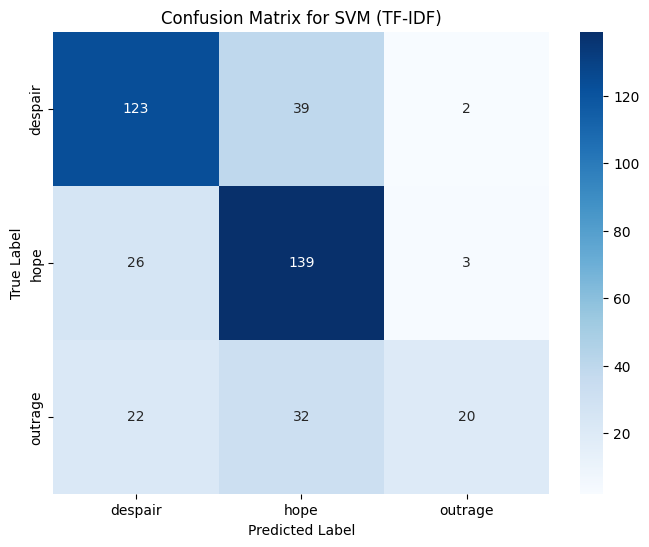


Sample Predictions:
Text: বৃষ্টির মধ্যে রাজশাহী বিশ্ববিদ্যালয়ের সামনের মহাসড়কে হাজারো শিক্ষার্থী, Predicted: hope, True: outrage
Text: জাতিসংঘ মহাসচিবের মুখপাত্র স্টিফেন ডুজারিক বলেছেন বাংলাদেশে সাম্প্রতিক সহিংস কর্মকাণ্ডে জড়িত সব অপরাধীকে জবাবদিহির আওতায় আনতে হবে, Predicted: hope, True: hope
Text: হবিগঞ্জ শহরের প্রধান সড়ক প্রায় দুই ঘন্টা অবরুদ্ধ করে রাখেন শিক্ষার্থীরা, Predicted: hope, True: outrage
Text: কোটাবিরোধী শিক্ষার্থীদের বাংলা ব্লকেড আজও ফার্মগেট পেরোনোর ঘোষণা, Predicted: outrage, True: hope
Text: সহিংসতার তদন্তে জাতিসংঘের সহায়তা থাকলে খুশি হবে বিএনপি, Predicted: hope, True: hope

Training Decision Tree with TF-IDF features...
Train Accuracy: 1.0
Test Accuracy: 0.5640394088669951
Classification Report:
               precision    recall  f1-score   support

     despair       0.56      0.60      0.58       164
        hope       0.60      0.58      0.59       168
     outrage       0.48      0.43      0.46        74

    accuracy                           0.56       406
   m

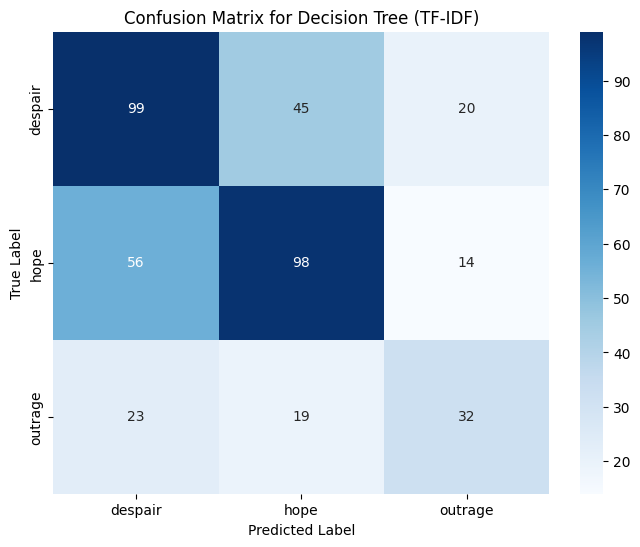


Sample Predictions:
Text: বৃষ্টির মধ্যে রাজশাহী বিশ্ববিদ্যালয়ের সামনের মহাসড়কে হাজারো শিক্ষার্থী, Predicted: hope, True: outrage
Text: জাতিসংঘ মহাসচিবের মুখপাত্র স্টিফেন ডুজারিক বলেছেন বাংলাদেশে সাম্প্রতিক সহিংস কর্মকাণ্ডে জড়িত সব অপরাধীকে জবাবদিহির আওতায় আনতে হবে, Predicted: hope, True: hope
Text: হবিগঞ্জ শহরের প্রধান সড়ক প্রায় দুই ঘন্টা অবরুদ্ধ করে রাখেন শিক্ষার্থীরা, Predicted: outrage, True: outrage
Text: কোটাবিরোধী শিক্ষার্থীদের বাংলা ব্লকেড আজও ফার্মগেট পেরোনোর ঘোষণা, Predicted: outrage, True: hope
Text: সহিংসতার তদন্তে জাতিসংঘের সহায়তা থাকলে খুশি হবে বিএনপি, Predicted: hope, True: hope

Training AdaBoost with TF-IDF features...
Train Accuracy: 0.5339087546239211
Test Accuracy: 0.5172413793103449
Classification Report:
               precision    recall  f1-score   support

     despair       0.48      0.96      0.64       164
        hope       0.66      0.27      0.38       168
     outrage       0.78      0.09      0.17        74

    accuracy                           0.52  

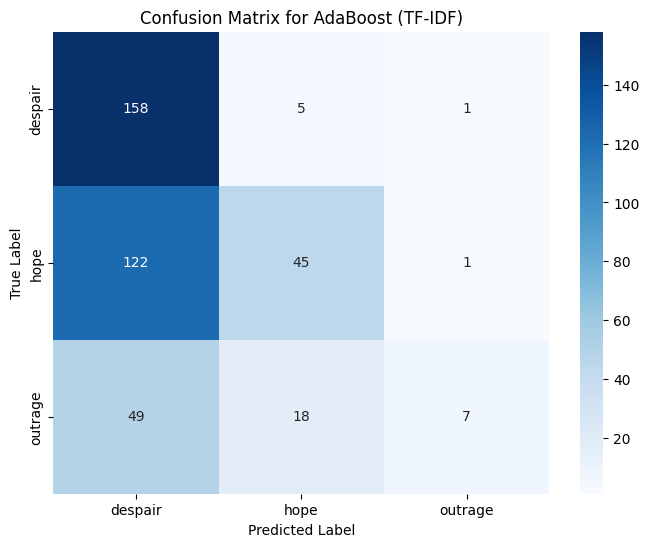


Sample Predictions:
Text: বৃষ্টির মধ্যে রাজশাহী বিশ্ববিদ্যালয়ের সামনের মহাসড়কে হাজারো শিক্ষার্থী, Predicted: despair, True: outrage
Text: জাতিসংঘ মহাসচিবের মুখপাত্র স্টিফেন ডুজারিক বলেছেন বাংলাদেশে সাম্প্রতিক সহিংস কর্মকাণ্ডে জড়িত সব অপরাধীকে জবাবদিহির আওতায় আনতে হবে, Predicted: hope, True: hope
Text: হবিগঞ্জ শহরের প্রধান সড়ক প্রায় দুই ঘন্টা অবরুদ্ধ করে রাখেন শিক্ষার্থীরা, Predicted: hope, True: outrage
Text: কোটাবিরোধী শিক্ষার্থীদের বাংলা ব্লকেড আজও ফার্মগেট পেরোনোর ঘোষণা, Predicted: despair, True: hope
Text: সহিংসতার তদন্তে জাতিসংঘের সহায়তা থাকলে খুশি হবে বিএনপি, Predicted: hope, True: hope

Training KNN with TF-IDF features...
Train Accuracy: 0.7774352651048089
Test Accuracy: 0.6576354679802956
Classification Report:
               precision    recall  f1-score   support

     despair       0.63      0.74      0.68       164
        hope       0.71      0.70      0.71       168
     outrage       0.57      0.36      0.45        74

    accuracy                           0.66       

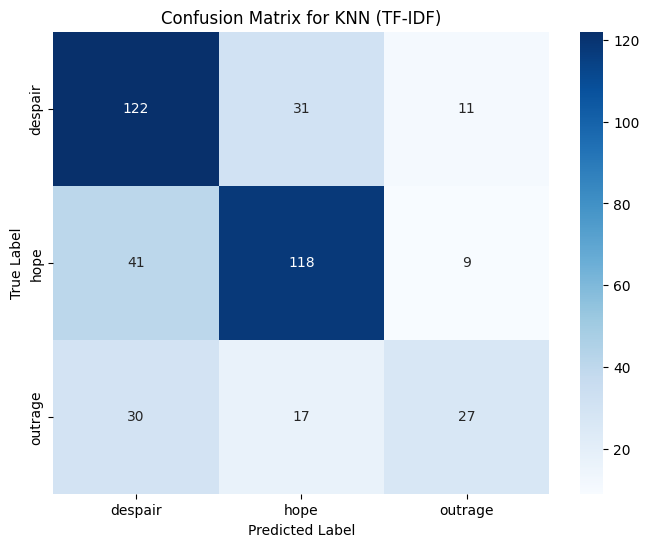


Sample Predictions:
Text: বৃষ্টির মধ্যে রাজশাহী বিশ্ববিদ্যালয়ের সামনের মহাসড়কে হাজারো শিক্ষার্থী, Predicted: hope, True: outrage
Text: জাতিসংঘ মহাসচিবের মুখপাত্র স্টিফেন ডুজারিক বলেছেন বাংলাদেশে সাম্প্রতিক সহিংস কর্মকাণ্ডে জড়িত সব অপরাধীকে জবাবদিহির আওতায় আনতে হবে, Predicted: hope, True: hope
Text: হবিগঞ্জ শহরের প্রধান সড়ক প্রায় দুই ঘন্টা অবরুদ্ধ করে রাখেন শিক্ষার্থীরা, Predicted: despair, True: outrage
Text: কোটাবিরোধী শিক্ষার্থীদের বাংলা ব্লকেড আজও ফার্মগেট পেরোনোর ঘোষণা, Predicted: outrage, True: hope
Text: সহিংসতার তদন্তে জাতিসংঘের সহায়তা থাকলে খুশি হবে বিএনপি, Predicted: hope, True: hope


In [86]:
for model_name, model in models_tfidf.items():
    train_and_evaluate_model(model, X_train_tfidf, y_train, X_test_tfidf, y_test, model_name, "TF-IDF", original_X_test)

In [87]:
# Models with Word2Vec
models_w2v = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42),
     "Decision Tree": DecisionTreeClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "KNN": KNeighborsClassifier()
}


Training Logistic Regression with Word2Vec features...
Train Accuracy: 0.5104808877928483
Test Accuracy: 0.5344827586206896
Classification Report:
               precision    recall  f1-score   support

     despair       0.50      0.63      0.56       164
        hope       0.58      0.64      0.61       168
     outrage       0.38      0.07      0.11        74

    accuracy                           0.53       406
   macro avg       0.49      0.45      0.43       406
weighted avg       0.51      0.53      0.50       406



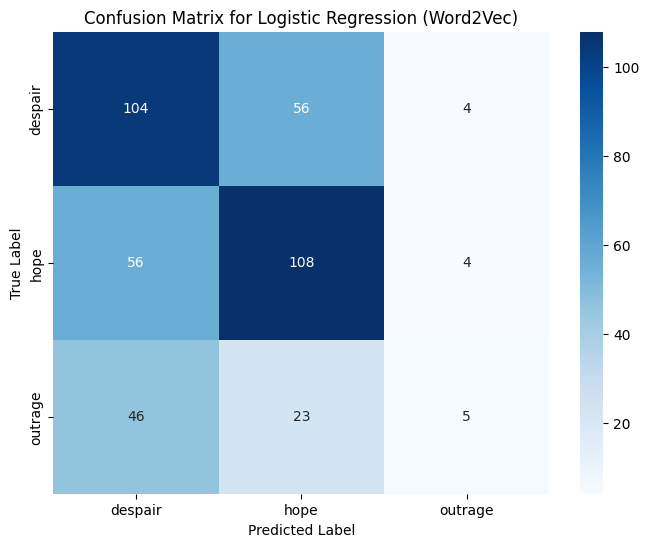


Sample Predictions:
Text: বৃষ্টির মধ্যে রাজশাহী বিশ্ববিদ্যালয়ের সামনের মহাসড়কে হাজারো শিক্ষার্থী, Predicted: despair, True: outrage
Text: জাতিসংঘ মহাসচিবের মুখপাত্র স্টিফেন ডুজারিক বলেছেন বাংলাদেশে সাম্প্রতিক সহিংস কর্মকাণ্ডে জড়িত সব অপরাধীকে জবাবদিহির আওতায় আনতে হবে, Predicted: hope, True: hope
Text: হবিগঞ্জ শহরের প্রধান সড়ক প্রায় দুই ঘন্টা অবরুদ্ধ করে রাখেন শিক্ষার্থীরা, Predicted: hope, True: outrage
Text: কোটাবিরোধী শিক্ষার্থীদের বাংলা ব্লকেড আজও ফার্মগেট পেরোনোর ঘোষণা, Predicted: despair, True: hope
Text: সহিংসতার তদন্তে জাতিসংঘের সহায়তা থাকলে খুশি হবে বিএনপি, Predicted: hope, True: hope

Training Random Forest with Word2Vec features...
Train Accuracy: 1.0
Test Accuracy: 0.5049261083743842
Classification Report:
               precision    recall  f1-score   support

     despair       0.49      0.54      0.51       164
        hope       0.52      0.58      0.55       168
     outrage       0.47      0.27      0.34        74

    accuracy                           0.50       406

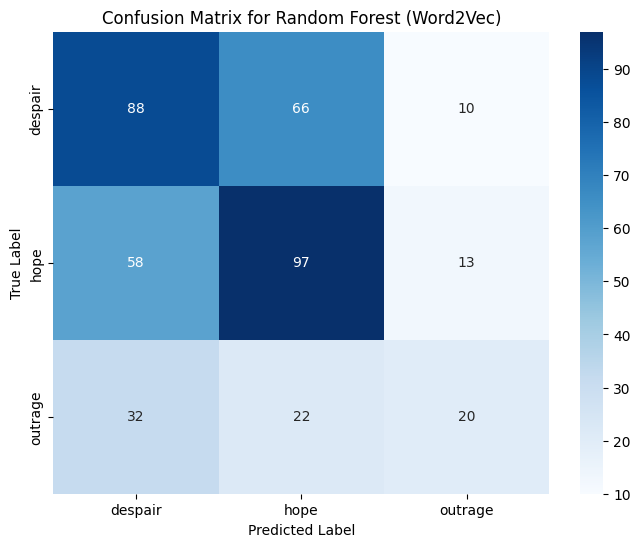


Sample Predictions:
Text: বৃষ্টির মধ্যে রাজশাহী বিশ্ববিদ্যালয়ের সামনের মহাসড়কে হাজারো শিক্ষার্থী, Predicted: hope, True: outrage
Text: জাতিসংঘ মহাসচিবের মুখপাত্র স্টিফেন ডুজারিক বলেছেন বাংলাদেশে সাম্প্রতিক সহিংস কর্মকাণ্ডে জড়িত সব অপরাধীকে জবাবদিহির আওতায় আনতে হবে, Predicted: hope, True: hope
Text: হবিগঞ্জ শহরের প্রধান সড়ক প্রায় দুই ঘন্টা অবরুদ্ধ করে রাখেন শিক্ষার্থীরা, Predicted: hope, True: outrage
Text: কোটাবিরোধী শিক্ষার্থীদের বাংলা ব্লকেড আজও ফার্মগেট পেরোনোর ঘোষণা, Predicted: outrage, True: hope
Text: সহিংসতার তদন্তে জাতিসংঘের সহায়তা থাকলে খুশি হবে বিএনপি, Predicted: hope, True: hope

Training SVM with Word2Vec features...
Train Accuracy: 0.44143033292231815
Test Accuracy: 0.43349753694581283
Classification Report:
               precision    recall  f1-score   support

     despair       0.43      0.27      0.33       164
        hope       0.44      0.79      0.56       168
     outrage       0.00      0.00      0.00        74

    accuracy                           0.43      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


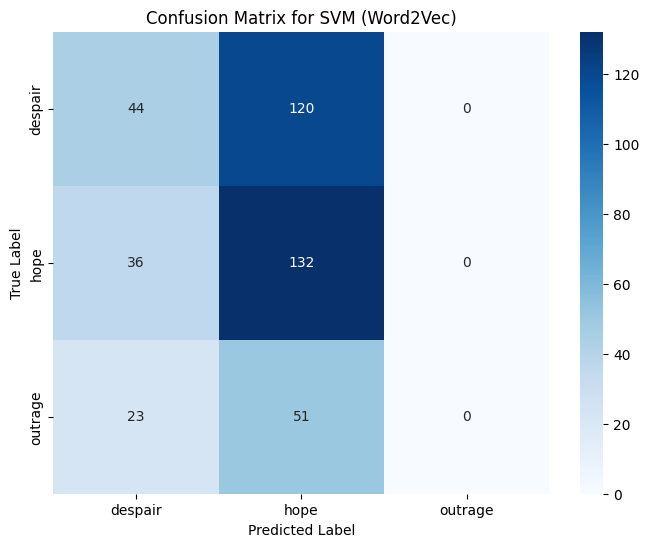


Sample Predictions:
Text: বৃষ্টির মধ্যে রাজশাহী বিশ্ববিদ্যালয়ের সামনের মহাসড়কে হাজারো শিক্ষার্থী, Predicted: hope, True: outrage
Text: জাতিসংঘ মহাসচিবের মুখপাত্র স্টিফেন ডুজারিক বলেছেন বাংলাদেশে সাম্প্রতিক সহিংস কর্মকাণ্ডে জড়িত সব অপরাধীকে জবাবদিহির আওতায় আনতে হবে, Predicted: hope, True: hope
Text: হবিগঞ্জ শহরের প্রধান সড়ক প্রায় দুই ঘন্টা অবরুদ্ধ করে রাখেন শিক্ষার্থীরা, Predicted: hope, True: outrage
Text: কোটাবিরোধী শিক্ষার্থীদের বাংলা ব্লকেড আজও ফার্মগেট পেরোনোর ঘোষণা, Predicted: hope, True: hope
Text: সহিংসতার তদন্তে জাতিসংঘের সহায়তা থাকলে খুশি হবে বিএনপি, Predicted: hope, True: hope

Training Decision Tree with Word2Vec features...
Train Accuracy: 1.0
Test Accuracy: 0.39901477832512317
Classification Report:
               precision    recall  f1-score   support

     despair       0.42      0.41      0.42       164
        hope       0.43      0.45      0.44       168
     outrage       0.27      0.26      0.26        74

    accuracy                           0.40       406
   m

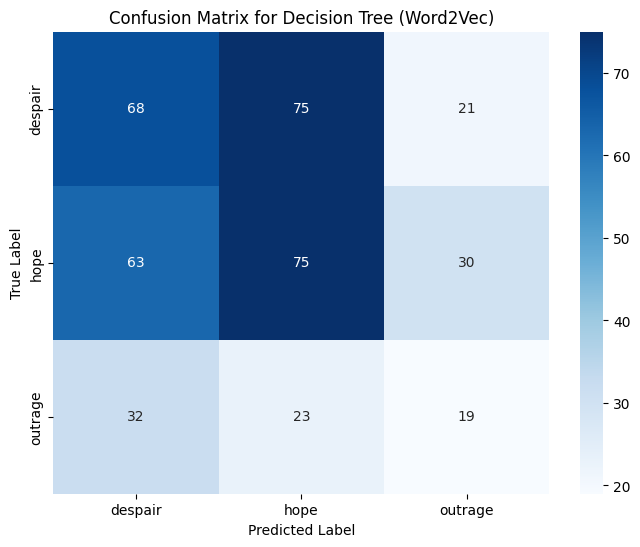


Sample Predictions:
Text: বৃষ্টির মধ্যে রাজশাহী বিশ্ববিদ্যালয়ের সামনের মহাসড়কে হাজারো শিক্ষার্থী, Predicted: despair, True: outrage
Text: জাতিসংঘ মহাসচিবের মুখপাত্র স্টিফেন ডুজারিক বলেছেন বাংলাদেশে সাম্প্রতিক সহিংস কর্মকাণ্ডে জড়িত সব অপরাধীকে জবাবদিহির আওতায় আনতে হবে, Predicted: hope, True: hope
Text: হবিগঞ্জ শহরের প্রধান সড়ক প্রায় দুই ঘন্টা অবরুদ্ধ করে রাখেন শিক্ষার্থীরা, Predicted: outrage, True: outrage
Text: কোটাবিরোধী শিক্ষার্থীদের বাংলা ব্লকেড আজও ফার্মগেট পেরোনোর ঘোষণা, Predicted: outrage, True: hope
Text: সহিংসতার তদন্তে জাতিসংঘের সহায়তা থাকলে খুশি হবে বিএনপি, Predicted: hope, True: hope

Training AdaBoost with Word2Vec features...
Train Accuracy: 0.5080147965474723
Test Accuracy: 0.5049261083743842
Classification Report:
               precision    recall  f1-score   support

     despair       0.48      0.60      0.53       164
        hope       0.54      0.52      0.53       168
     outrage       0.49      0.26      0.34        74

    accuracy                           0

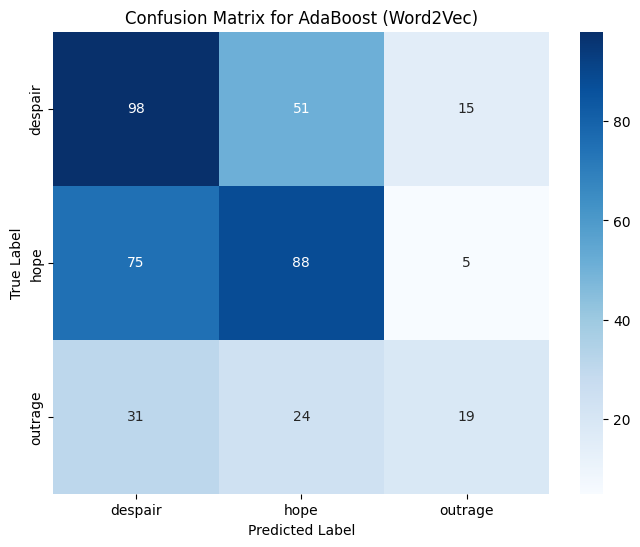


Sample Predictions:
Text: বৃষ্টির মধ্যে রাজশাহী বিশ্ববিদ্যালয়ের সামনের মহাসড়কে হাজারো শিক্ষার্থী, Predicted: despair, True: outrage
Text: জাতিসংঘ মহাসচিবের মুখপাত্র স্টিফেন ডুজারিক বলেছেন বাংলাদেশে সাম্প্রতিক সহিংস কর্মকাণ্ডে জড়িত সব অপরাধীকে জবাবদিহির আওতায় আনতে হবে, Predicted: hope, True: hope
Text: হবিগঞ্জ শহরের প্রধান সড়ক প্রায় দুই ঘন্টা অবরুদ্ধ করে রাখেন শিক্ষার্থীরা, Predicted: hope, True: outrage
Text: কোটাবিরোধী শিক্ষার্থীদের বাংলা ব্লকেড আজও ফার্মগেট পেরোনোর ঘোষণা, Predicted: despair, True: hope
Text: সহিংসতার তদন্তে জাতিসংঘের সহায়তা থাকলে খুশি হবে বিএনপি, Predicted: hope, True: hope

Training KNN with Word2Vec features...
Train Accuracy: 0.6411837237977805
Test Accuracy: 0.4729064039408867
Classification Report:
               precision    recall  f1-score   support

     despair       0.46      0.59      0.52       164
        hope       0.51      0.49      0.50       168
     outrage       0.41      0.18      0.25        74

    accuracy                           0.47     

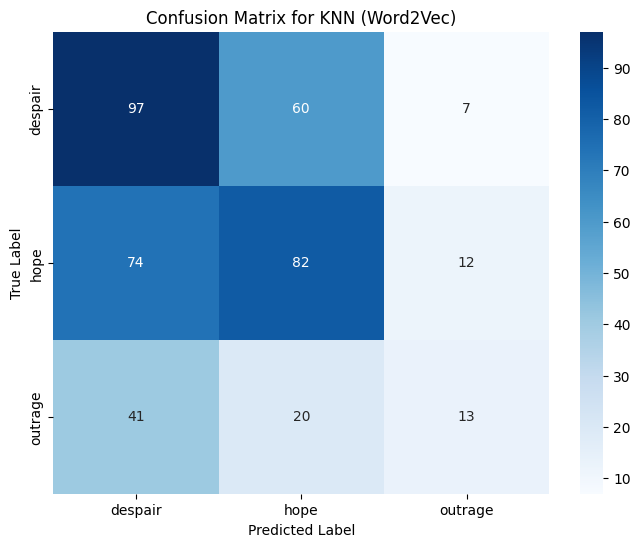


Sample Predictions:
Text: বৃষ্টির মধ্যে রাজশাহী বিশ্ববিদ্যালয়ের সামনের মহাসড়কে হাজারো শিক্ষার্থী, Predicted: despair, True: outrage
Text: জাতিসংঘ মহাসচিবের মুখপাত্র স্টিফেন ডুজারিক বলেছেন বাংলাদেশে সাম্প্রতিক সহিংস কর্মকাণ্ডে জড়িত সব অপরাধীকে জবাবদিহির আওতায় আনতে হবে, Predicted: hope, True: hope
Text: হবিগঞ্জ শহরের প্রধান সড়ক প্রায় দুই ঘন্টা অবরুদ্ধ করে রাখেন শিক্ষার্থীরা, Predicted: hope, True: outrage
Text: কোটাবিরোধী শিক্ষার্থীদের বাংলা ব্লকেড আজও ফার্মগেট পেরোনোর ঘোষণা, Predicted: outrage, True: hope
Text: সহিংসতার তদন্তে জাতিসংঘের সহায়তা থাকলে খুশি হবে বিএনপি, Predicted: despair, True: hope


In [88]:
for model_name, model in models_w2v.items():
    train_and_evaluate_model(model, X_train_w2v, y_train, X_test_w2v, y_test, model_name, "Word2Vec",original_X_test)